In [30]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
tickers = ['AAPL', 'MSFT', 'META', 'NVDA', 'F', 'TSLA', 'GOOGL', 'CVX', 'XOM', 'MS'] 

In [32]:
data = yf.download(tickers, period = '10y', interval = '1d')

[*********************100%%**********************]  10 of 10 completed


In [33]:
data

Adj Close                                                 \
                  AAPL         CVX          F       GOOGL        META   
Date                                                                    
2013-10-07   15.203009   77.627701  10.493252   21.665165   50.520000   
2013-10-08   14.990746   76.876892  10.299741   21.363113   47.139999   
2013-10-09   15.166855   76.481743  10.374651   21.417917   46.770000   
2013-10-10   15.261927   76.646393  10.568158   21.727728   49.049999   
2013-10-11   15.360730   77.495972  10.680519   21.821571   49.110001   
...                ...         ...        ...         ...         ...   
2023-09-28  170.690002  170.589996  12.560000  132.309998  303.959991   
2023-09-29  171.210007  168.619995  12.420000  130.860001  300.209991   
2023-10-02  173.750000  166.539993  12.310000  134.169998  306.820007   
2023-10-03  172.399994  166.929993  12.070000  132.429993  300.940002   
2023-10-04  173.660004  163.039993  11.990000  135.240005  305.579987   

                                                                       ...  \
                   MS        MSFT        NVDA        TSLA         XOM  ...   
Date                                                                   ...   
2013-10-07  21.203587   27.885908    3.657556   12.204667   56.001095  ...   
2013-10-08  20.974485   27.643063    3.627056   11.648667   55.746841  ...   
2013-10-09  21.148287   27.693302    3.570750   11.252000   55.518669  ...   
2013-10-10  21.835583   28.271120    3.610634   11.528667   56.092373  ...   
2013-10-11  22.080486   28.580965    3.580134   11.913333   56.685612  ...   
...               ...         ...         ...         ...         ...  ...   
2023-09-28  82.190002  313.640015  430.890015  246.380005  119.470001  ...   
2023-09-29  81.669998  315.750000  434.989990  250.220001  117.580002  ...   
2023-10-02  80.410004  321.799988  447.820007  251.600006  115.629997  ...   
2023-10-03  78.019997  313.390015  435.170013  246.529999  115.830002  ...   
2023-10-04  79.089996  318.959991  440.410004  261.160004  111.500000  ...   

               Volume                                                      \
                 AAPL       CVX         F      GOOGL       META        MS   
Date                                                                        
2013-10-07  312292400   5677400  30339600   51692256   57204000  13353400   
2013-10-08  290917200   6744200  45491300   77670252  136081000  16446500   
2013-10-09  301725200   8861700  50838200  105945948  147297000  14190700   
2013-10-10  278602800  11133000  46955700   90121788   99774000  14463000   
2013-10-11  267738800   6535800  30814200   56299644   58428000  11202500   
...               ...       ...       ...        ...        ...       ...   
2023-09-28   56294400   7151800  49109800   22513100   22167100   5665400   
2023-09-29   51814200   7395200  62303900   30848100   25356600   6830500   
2023-10-02   52164500   6839600  51204000   22288000   16265600   6722200   
2023-10-03   49594600   6168600  55074700   22989400   17362300   7526800   
2023-10-04   52963300   9660300  45154200   26730100   16820300   6846800   

                                                     
                MSFT      NVDA       TSLA       XOM  
Date                                                 
2013-10-07  35069300  16995200  172284000  10985800  
2013-10-08  41017600  29071200  206358000  15335700  
2013-10-09  35878600  27586000  229747500  13575100  
2013-10-10  42875100  22348400  133258500  17532400  
2013-10-11  30033300  21370400  124666500  12661800  
...              ...       ...        ...       ...  
2023-09-28  19683600  42466300  117058900  16808100  
2023-09-29  24140300  39722100  128346200  18810700  
2023-10-02  20570000  43329800  123810400  14395000  
2023-10-03  21033500  47085000  101985300  13297100  
2023-10-04  20673500  36113900  129411800  19610600  

[2516 rows x 60 columns]

In [34]:
adjusted_close_df = data['Adj Close']

In [35]:
cols = list(adjusted_close_df.columns)

# Stock Analysis

In [36]:
for i in cols:
    adjusted_close_df[i +' %return'] = adjusted_close_df[i] / adjusted_close_df[i].shift(1) -1

In [37]:
adjusted_close_df.dropna(inplace = True)

In [38]:
adjusted_close_df2 = adjusted_close_df.iloc[:252*5]

In [41]:
return_cols = list(adjusted_close_df2.columns)[-10:]

In [42]:
adjusted_close_df2

,AAPL,CVX,F,GOOGL,META,MS,MSFT,NVDA,TSLA,XOM,AAPL %return,CVX %return,F %return,GOOGL %return,META %return,MS %return,MSFT %return,NVDA %return,TSLA %return,XOM %return
Date,,,,,,,,,,,,,,,,,,,,
2013-10-08,14.990746,76.876892,10.299741,21.363113,47.139999,20.974485,27.643063,3.627056,11.648667,55.746841,-0.013962,-0.009672,-0.018441,-0.013942,-0.066904,-0.010805,-0.008709,-0.008339,-0.045556,-0.004540
2013-10-09,15.166855,76.481743,10.374651,21.417917,46.770000,21.148287,27.693302,3.570750,11.252000,55.518669,0.011748,-0.005140,0.007273,0.002565,-0.007849,0.008286,0.001817,-0.015524,-0.034053,-0.004093
2013-10-10,15.261927,76.646393,10.568158,21.727728,49.049999,21.835583,28.271120,3.610634,11.528667,56.092373,0.006268,0.002153,0.018652,0.014465,0.048749,0.032499,0.020865,0.011170,0.024588,0.010334
2013-10-11,15.360730,77.495972,10.680519,21.821571,49.110001,22.080486,28.580965,3.580134,11.913333,56.685612,0.006474,0.011084,0.010632,0.004319,0.001223,0.011216,0.010960,-0.008447,0.033366,0.010576
2013-10-14,15.461408,78.095284,10.724216,21.924675,49.509998,22.262184,28.848938,3.634094,11.981333,57.109398,0.006554,0.007733,0.004091,0.004725,0.008145,0.008229,0.009376,0.015072,0.005708,0.007476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-02,54.897293,100.181122,7.380023,60.382000,159.330002,40.169289,109.096733,70.998894,20.068001,66.882080,0.008889,0.002814,-0.012876,-0.000736,-0.019146,0.000000,-0.003979,-0.009953,-0.031155,0.007575
2018-10-03,55.565311,100.638908,7.323871,60.576500,162.429993,40.582783,109.115685,71.060860,19.653334,66.642281,0.012169,0.004570,-0.007609,0.003221,0.019456,0.010294,0.000174,0.000873,-0.020663,-0.003585
2018-10-04,54.588432,100.349777,7.339915,58.853500,158.850006,40.720612,106.860817,69.216995,18.788668,66.201347,-0.017581,-0.002873,0.002191,-0.028443,-0.022040,0.003396,-0.020665,-0.025948,-0.043996,-0.006616


In [43]:
return1 = []
risk = []

for i in return_cols:
    temp = adjusted_close_df2[i].mean()
    temp1 = ((temp+1) ** 250 -1) * 100
    return1.append(temp1)
    temp2 = adjusted_close_df2[i].std() * np.sqrt(250) *100
    risk.append(temp2)
    

In [44]:
risk_return_df = pd.DataFrame(index = cols)
risk_return_df['%return'] = return1
risk_return_df['%risk'] = risk
risk_return_df['risk_adjusted_return'] = risk_return_df['%return'] / risk_return_df['%risk']

In [45]:
risk_return_df

,%return,%risk,risk_adjusted_return
AAPL,31.645728,22.397176,1.412934
CVX,7.567823,21.074616,0.359097
F,-4.317410,22.021392,-0.196055
GOOGL,24.657244,22.861077,1.078569
META,30.916812,29.662254,1.042295
MS,17.399193,25.274141,0.688419
MSFT,33.246713,21.941479,1.515245
NVDA,89.397780,36.738957,2.433324
TSLA,17.842023,45.291339,0.393939
XOM,5.194811,17.987912,0.288795


# Portfolio Creation

In [46]:
risk_adjusted_return_list = list(risk_return_df['risk_adjusted_return'])
sum_list = np.sum(risk_adjusted_return_list)
weight_array = risk_adjusted_return_list / sum_list
risk_return_df['weightage'] = weight_array

In [47]:
risk_return_df

,%return,%risk,risk_adjusted_return,weightage
AAPL,31.645728,22.397176,1.412934,0.156704
CVX,7.567823,21.074616,0.359097,0.039826
F,-4.317410,22.021392,-0.196055,-0.021744
GOOGL,24.657244,22.861077,1.078569,0.119621
META,30.916812,29.662254,1.042295,0.115598
MS,17.399193,25.274141,0.688419,0.076350
MSFT,33.246713,21.941479,1.515245,0.168051
NVDA,89.397780,36.738957,2.433324,0.269873
TSLA,17.842023,45.291339,0.393939,0.043691
XOM,5.194811,17.987912,0.288795,0.032029


# Calculating the NAV of the Portfolio

In [48]:
return_df = adjusted_close_df.iloc[252*5:,10:]

In [50]:
rebased_df = pd.DataFrame()

for j in list(return_df.columns):
    rebased_price_list = [100]
    for i in list(return_df[j]):
        temp = rebased_price_list[-1] * (i+1)
        rebased_price_list.append(temp)
    rebased_df[j] = rebased_price_list

In [51]:
rebased_df

,AAPL %return,CVX %return,F %return,GOOGL %return,META %return,MS %return,MSFT %return,NVDA %return,TSLA %return,XOM %return
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.385339,101.586041,96.652259,99.070001,100.413351,98.171019,101.271994,99.913474,104.885057,100.441216
2,96.688553,98.205718,95.248379,94.484048,96.267094,94.895804,95.769053,92.444598,102.522350,98.130749
3,95.835006,94.865436,95.140400,94.361197,97.519877,92.492592,95.543519,88.471240,100.666499,94.740515
4,99.258164,94.336743,93.304531,96.939233,97.767889,92.364981,98.845277,92.764426,103.280653,94.485084
...,...,...,...,...,...,...,...,...,...,...
1251,318.582128,170.145175,169.086430,228.925867,193.297292,202.912017,298.639960,654.188938,1474.976041,179.312229
1252,319.552683,168.180310,167.201704,226.417049,190.912554,201.628222,300.649033,660.413632,1497.964524,176.475534
1253,324.293420,166.105732,165.720857,232.144084,195.116062,198.517527,306.409676,679.892513,1506.226048,173.548777
1254,321.773719,166.494715,162.489896,229.133486,191.376790,192.617039,298.401916,660.686948,1475.873993,173.848963


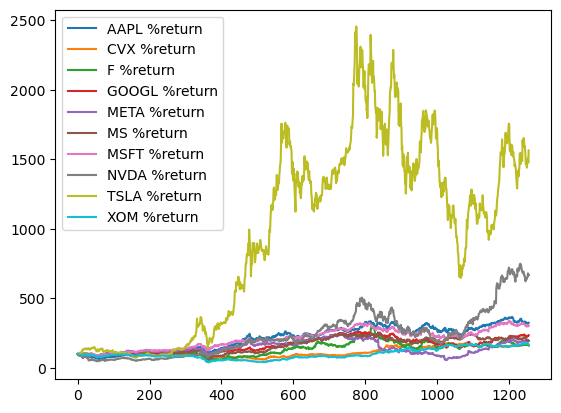

In [53]:
plt.plot(rebased_df)
plt.legend(rebased_df.columns)
plt.show()

In [55]:
rebased_df.dot(list(risk_return_df['weightage']))

0       100.000000
1       100.567912
2        95.332213
3        93.714540
4        96.416651
           ...    
1251    415.164815
1252    417.536863
1253    425.654932
1254    416.257684
1255    424.276166
Length: 1256, dtype: float64

In [105]:
final_df = pd.DataFrame()
final_df['portfolio_NAV'] = rebased_df.dot(list(risk_return_df['weightage']))

In [106]:
final_df

,portfolio_NAV
0,100.000000
1,100.567912
2,95.332213
3,93.714540
4,96.416651
...,...
1251,415.164815
1252,417.536863
1253,425.654932
1254,416.257684


# Creating the Benchmark - 'S&P 500' 

In [83]:
ticker = 'SPY'

spy = yf.download(ticker, period = '5y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


In [84]:
spy['adj_close_returns'] = spy['Adj Close'] / spy['Adj Close'].shift(1) -1
spy.dropna(inplace = True)

# Rebasing the Price

In [85]:
rebase_df_list = [100]
for i in list(spy['adj_close_returns']):
    temp = rebase_df_list[-1] * (i + 1)
    rebase_df_list.append(temp)

In [90]:
final_df['S&P500_NAV'] = rebase_df_list[:-2]

In [93]:
final_df = final_df.drop(columns = 'SPY_NAV')

In [94]:
final_df

,portfolio_NAV,S&P500_NAV
0,100.000000,100.000000
1,100.567912,100.000000
2,95.332213,99.854071
3,93.714540,96.692373
4,96.416651,94.562581
...,...,...
1251,415.164815,160.910540
1252,417.536863,161.843410
1253,425.654932,161.450631
1254,416.257684,161.386420


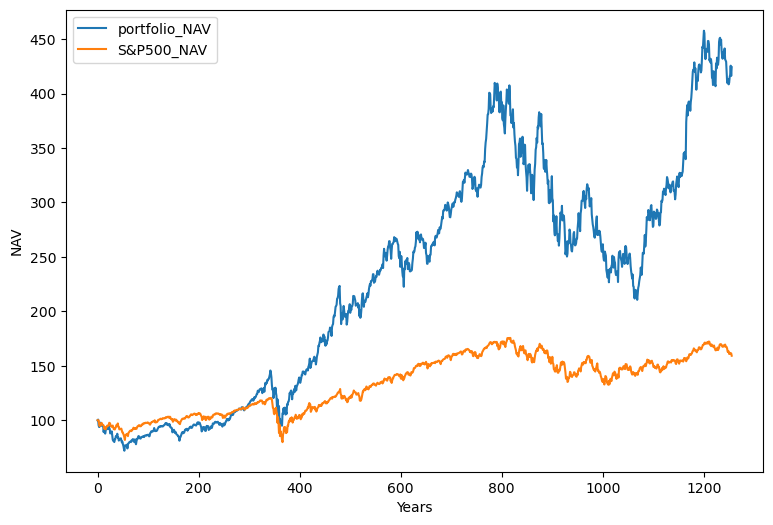

In [99]:
plt.figure(figsize = (9,6))
plt.xlabel('Years')
plt.ylabel('NAV')
plt.plot(final_df)
plt.legend(final_df.columns)
plt.show()

In [102]:
df_index = return_df.index